In [8]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/MLA_100k_cleaned.csv')

# **Análisis de la Matriz de Correlación y Selección de Variables para Modelo de Machine Learning**

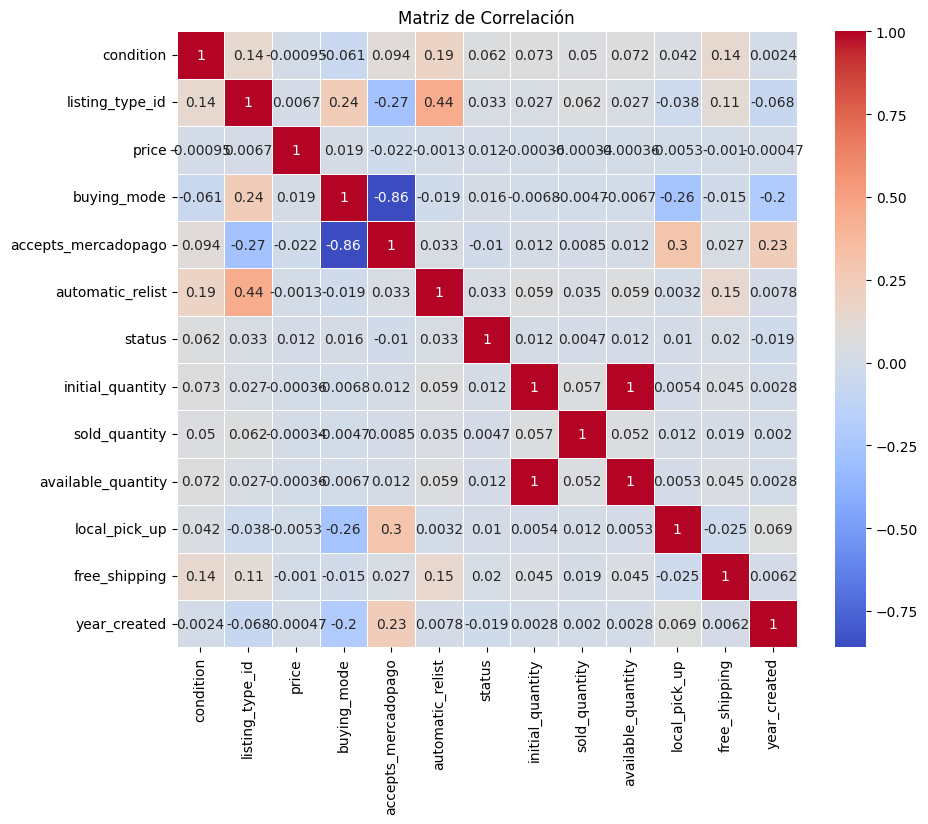

In [10]:
# Crear la matriz de correlación
corr_matrix = df.corr()

# Plotear la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## *Resumen del Análisis de Correlación*

### 1. Variables con alta correlación negativa:
- **`accepts_mercadopago` y `buying_mode`**:
  - La correlación entre estas dos variables es de **-0.86**, lo que puede significar que existe una fuerte relación inversa entre ellas.

### 2. Correlaciones moderadas:
- **`automatic_relist`**:
  - Tienen una correlación moderada de **0.44**, lo que sugiere que estas variables tienen cierta relación.
  
- **`year_created` y `buying_mode`**:
  - La correlación es de **0.23**, lo que indica una relación moderada. Podrían aportar información útil al modelo.

- **`local_pick_up` y `buying_mode`**:
  - Con una correlación de **-0.26**, tienen una relación algo significativa pero no lo suficientemente fuerte como para causar problemas.

### 3. Variables sin correlación significativa:
- La mayoría de las otras correlaciones son bastante bajas (valores cercanos a 0), lo que sugiere que no hay relaciones fuertes entre esas variables. Las variables con valores de correlación cercanos a cero son generalmente independientes, y en muchos casos pueden ser útiles para el modelo.



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar datos
df = pd.read_csv('../data/MLA_100k_cleaned.csv')

X = df.drop(['condition'], axis=1)
y = df['condition']

# Definir los modelos de clasificación
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

def train_classification_model(model, X, y):
    """Train a classification model and return accuracy"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    
    return accuracy

for model_name, model in classification_models.items():
    accuracy = train_classification_model(model, X, y)
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')

Model: Logistic Regression
Accuracy: 0.7150
Model: MLP
Accuracy: 0.7174
Model: Decision Tree
Accuracy: 0.8160
Model: Random Forest
Accuracy: 0.8227


c:\Users\LENOVO\AppData\Local\pypoetry\Cache\virtualenvs\model-training-M_TD1GvH-py3.12\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:27:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.8309
